<a href="https://colab.research.google.com/github/Data-finest/Habibty/blob/main/Insurance_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **BGLi Commercial Pricing - Case Study 💯**
🤝
---


### It is noted that data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively.
    *Here i'm going to do analysis & visualisation of different insurance policy offered to a customer,according to BGLi Company *.......*

In [ ]:
#Importing of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

In [ ]:
#Mount file from google drive 
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Dataset of BGL Insurance
data = pd.read_csv("/content/pricing analyst.csv")
data

,Month,Channel,Customer Age,Customer Month Of Birth,Customer Marital Status,Customer Occupation Status,Policy Annual Mileage,Policy Legal Cover,Vehicle Fuel Type,Vehicle Colour,Price Point,Customer Price,Purchase Flag
0,9,Comparison Site,43,1,Partnered,Employed,7999,Yes,Diesel,Grey,Higher,"£1,020.63",1
1,8,Comparison Site,57,4,Single,Employed,6000,Yes,Petrol,Grey,Base,£287.94,1
2,8,Telesales,83,11,Married,Retired,11000,Yes,Diesel,Blue,Lower,£858.24,1
3,8,Comparison Site,52,8,Married,Employed,14000,No,Diesel,Blue,Base,£382.15,1
4,9,Telesales,69,1,Single,Retired,3000,Yes,Petrol,Blue,Higher,£376.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,Comparison Site,51,7,Divorced,Self-Employed,10999,No,Petrol,Black,Base,£532.87,1
19996,11,Comparison Site,34,6,Married,Employed,4000,Yes,Diesel,White,Higher,£561.24,0
19997,11,Comparison Site,55,10,Married,Employed,19000,No,Diesel,Black,Higher,£950.53,0
19998,7,Comparison Site,33,10,Married,Employed,5000,Yes,Petrol,White,Base,£293.83,1


In [ ]:
data.shape
data.info

<bound method DataFrame.info of        Month          Channel  Customer Age  Customer Month Of Birth  \
0          9  Comparison Site            43                        1   
1          8  Comparison Site            57                        4   
2          8        Telesales            83                       11   
3          8  Comparison Site            52                        8   
4          9        Telesales            69                        1   
...      ...              ...           ...                      ...   
19995     10  Comparison Site            51                        7   
19996     11  Comparison Site            34                        6   
19997     11  Comparison Site            55                       10   
19998      7  Comparison Site            33                       10   
19999     10  Comparison Site            53                        0   

      Customer Marital Status Customer Occupation Status  \
0                   Partnered              

In [ ]:
data.head(5)

,Month,Channel,Customer Age,Customer Month Of Birth,Customer Marital Status,Customer Occupation Status,Policy Annual Mileage,Policy Legal Cover,Vehicle Fuel Type,Vehicle Colour,Price Point,Customer Price,Purchase Flag
0,9,Comparison Site,43,1,Partnered,Employed,7999,Yes,Diesel,Grey,Higher,"£1,020.63",1
1,8,Comparison Site,57,4,Single,Employed,6000,Yes,Petrol,Grey,Base,£287.94,1
2,8,Telesales,83,11,Married,Retired,11000,Yes,Diesel,Blue,Lower,£858.24,1
3,8,Comparison Site,52,8,Married,Employed,14000,No,Diesel,Blue,Base,£382.15,1
4,9,Telesales,69,1,Single,Retired,3000,Yes,Petrol,Blue,Higher,£376.22,1


In [ ]:
data.describe()

,Month,Customer Age,Customer Month Of Birth,Policy Annual Mileage,Purchase Flag
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,8.761600,56.347350,5.560000,7790.181950,0.639950
std,1.511284,14.514056,3.467204,9820.941138,0.480027
min,-45.000000,12.000000,0.000000,-100000.000000,0.000000
25%,8.000000,46.000000,3.000000,4999.000000,0.000000
50%,9.000000,57.000000,6.000000,7000.000000,1.000000
75%,10.000000,68.000000,9.000000,10000.000000,1.000000
max,80.000000,550.000000,11.000000,1000000.000000,1.000000


### Data Cleaning

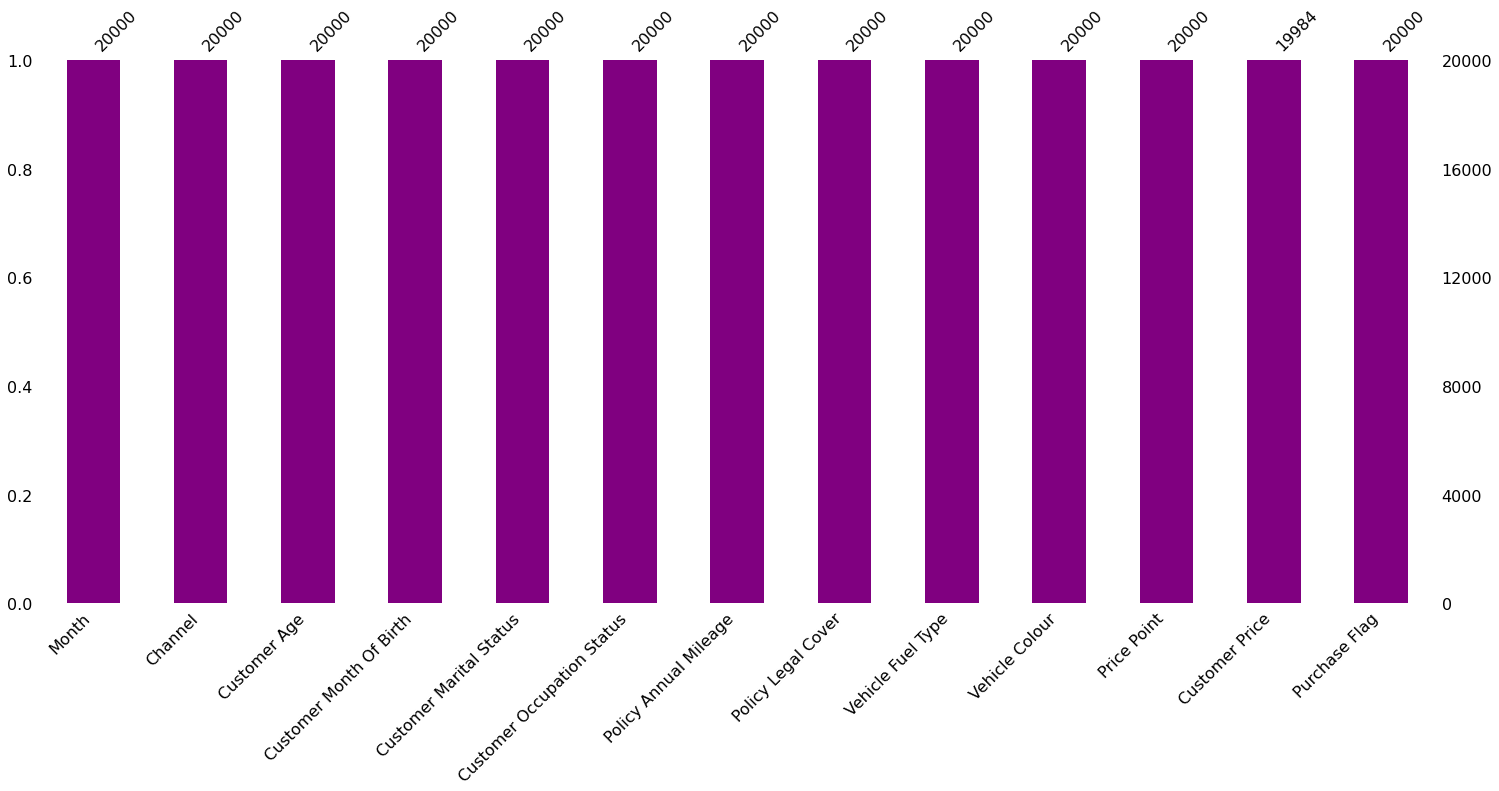

In [ ]:
# finding out if there are any null values or not
null = msno.bar(data,color='purple')

This chart shows that Customer_Price as null values

In [ ]:
#checking null values
data.isnull().sum()
# data.isnull().values.any()

Month                          0
Channel                        0
Customer Age                   0
Customer Month Of Birth        0
Customer Marital Status        0
Customer Occupation Status     0
Policy Annual Mileage          0
Policy Legal Cover             0
Vehicle Fuel Type              0
Vehicle Colour                 0
Price Point                    0
Customer Price                16
Purchase Flag                  0
dtype: int64

In [ ]:
data.nunique()

Month                             7
Channel                           3
Customer Age                     78
Customer Month Of Birth          12
Customer Marital Status           4
Customer Occupation Status        6
Policy Annual Mileage           216
Policy Legal Cover                2
Vehicle Fuel Type                 3
Vehicle Colour                    5
Price Point                       3
Customer Price                16717
Purchase Flag                     2
dtype: int64

### Data Pre-Processing 

In [ ]:
data["Month"].value_counts   

<bound method IndexOpsMixin.value_counts of 0         9
1         8
2         8
3         8
4         9
         ..
19995    10
19996    11
19997    11
19998     7
19999    10
Name: Month, Length: 20000, dtype: int64>

In [ ]:
data["Channel"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Comparison Site
1        Comparison Site
2              Telesales
3        Comparison Site
4              Telesales
              ...       
19995    Comparison Site
19996    Comparison Site
19997    Comparison Site
19998    Comparison Site
19999    Comparison Site
Name: Channel, Length: 20000, dtype: object>

In [ ]:
data["Customer Age"].value_counts

<bound method IndexOpsMixin.value_counts of 0        43
1        57
2        83
3        52
4        69
         ..
19995    51
19996    34
19997    55
19998    33
19999    53
Name: Customer Age, Length: 20000, dtype: int64>

In [ ]:
data["Customer Month Of Birth"].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         4
2        11
3         8
4         1
         ..
19995     7
19996     6
19997    10
19998    10
19999     0
Name: Customer Month Of Birth, Length: 20000, dtype: int64>

In [ ]:
data["Customer Marital Status"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Partnered
1           Single
2          Married
3          Married
4           Single
           ...    
19995     Divorced
19996      Married
19997      Married
19998      Married
19999    Partnered
Name: Customer Marital Status, Length: 20000, dtype: object>

In [ ]:
data["Customer Occupation Status"].value_counts

<bound method IndexOpsMixin.value_counts of 0             Employed
1             Employed
2              Retired
3             Employed
4              Retired
             ...      
19995    Self-Employed
19996         Employed
19997         Employed
19998         Employed
19999         Employed
Name: Customer Occupation Status, Length: 20000, dtype: object>

In [ ]:
data["Policy Annual Mileage"].value_counts

<bound method IndexOpsMixin.value_counts of 0         7999
1         6000
2        11000
3        14000
4         3000
         ...  
19995    10999
19996     4000
19997    19000
19998     5000
19999    15000
Name: Policy Annual Mileage, Length: 20000, dtype: int64>

In [ ]:
data["Policy Legal Cover"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Yes
1        Yes
2        Yes
3         No
4        Yes
        ... 
19995     No
19996    Yes
19997     No
19998    Yes
19999    Yes
Name: Policy Legal Cover, Length: 20000, dtype: object>

In [ ]:
data["Customer Price"].value_counts()

£323.75      5
£436.63      5
£261.91      4
£334.14      4
£386.89      4
            ..
£326.61      1
£1,063.16    1
£260.86      1
£551.76      1
£950.53      1
Name: Customer Price, Length: 16717, dtype: int64

In [ ]:
data["Customer Price"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Customer Price, Length: 20000, dtype: bool

In [ ]:
# data.drop(['Price Point'],axis=1,inplace=True)

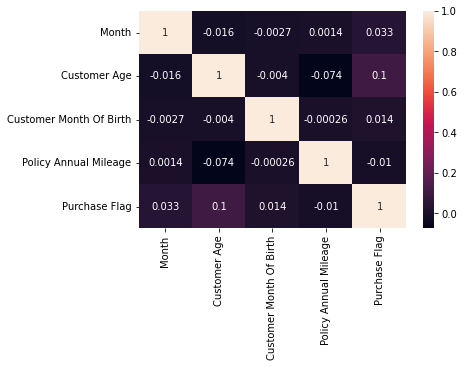

In [ ]:
#correlation plot
correlation = data.corr()
sns.heatmap(correlation,xticklabels= correlation.columns, yticklabels=correlation.columns, annot =True)
# sns.pairplot(data)

*The correlation plot shows the relationship between the columns in the dataset,where Customer_Age shows a strongest relationship with the Purchasing_Flag and the least relationship happens with the Customer_Month_of_Birth against Policy_Annual_Mileage. *

In [ ]:
# striping empty spaces and converting to float .dtype i.e fixing the errors
data['Customer Price']=data['Customer Price'].str.strip(' ').str.replace(',','').str.lstrip('£').fillna(0).astype('float')

In [ ]:
#Transforming choosen columns
from numpy.ma.core import count
pf=data.groupby('Customer Occupation Status')['Customer Age'].count().reset_index(name='count')
# pf['count']=data.groupby('Customer Occupation Status')['Customer Age'].transform('count')
employement_status=pf.sort_values('count',ascending=False)

In [ ]:
#printing 
pf

,Customer Occupation Status,count
0,Employed,11547
1,Full Time Education,85
2,House Person,661
3,Retired,6260
4,Self-Employed,1368
5,Unemployed,79



> pf shows the total number of Customers_Occupation status. 
where the number of employed individuals posed as the highest(11547), followed by the Retired persons (6260), the self-employed (1368), the House person (661),
Individuals with Full Time education (85) and the least as the Unemployed people(79).



Text(0.5, 0, 'Count')

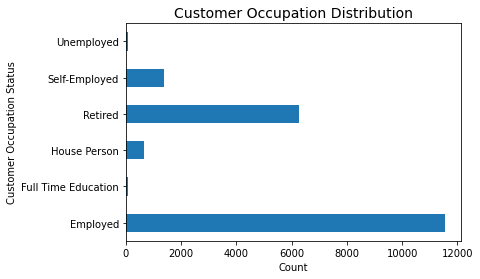

In [ ]:
pf.plot.barh(x='Customer Occupation Status',y='count',legend=False)
plt.title('Customer Occupation Distribution',fontsize=14)
plt.xlabel('Count')

The chart shows that Employed customers are the most subscribers of an insurance policy, followed by the Retirees and the Self-Employed. The House-Person also shows a good handful of subscribers and the Unemployed are the least subscribers of any insurance policy due to lack of income.

In [ ]:
# processing some strategic columns for analysis
df=data.groupby('Customer Occupation Status')['Customer Age'].count().reset_index(name='count')
purchased_df = data[data['Purchase Flag'] == 1]
purchased_df_grouped = purchased_df.groupby('Customer Occupation Status')['Customer Age'].count().reset_index(name='count')
#spliting of the dataset 
employement_status=df.sort_values('count',ascending=False)
employement_status['count_p'] = purchased_df_grouped['count']


In [ ]:
employement_status['count_p']

0    7284
3    4156
4     859
2     437
1      23
5      40
Name: count_p, dtype: int64

In [ ]:
# df
data[data['Purchase Flag'] == 1].count()

Month                         12799
Channel                       12799
Customer Age                  12799
Customer Month Of Birth       12799
Customer Marital Status       12799
Customer Occupation Status    12799
Policy Annual Mileage         12799
Policy Legal Cover            12799
Vehicle Fuel Type             12799
Vehicle Colour                12799
Price Point                   12799
Customer Price                12799
Purchase Flag                 12799
dtype: int64

In [ ]:
employement_status['percentage_purchased'] = employement_status['count_p'] / employement_status['count']
employement_status


,Customer Occupation Status,count,count_p,percentage_purchased
0,Employed,11547,7284,0.630813
3,Retired,6260,4156,0.663898
4,Self-Employed,1368,859,0.627924
2,House Person,661,437,0.661120
1,Full Time Education,85,23,0.270588
5,Unemployed,79,40,0.506329




> This shows the percentages of occupation status of customers who subscribe to a certain insurance policy. 
 -The highest purchaser of an insurance policy at BGLi are the Employed people counting to 7284 out of 11547 and representing(63%).
 -Followed by the Retirees with 4156 from 6260 members with (66.4%)
 -The House Person shows a good amount of purchases with 437 out of 661 amounting to (66.1%).
 -Also, the self-employed persons have a fair number of purchasers with 859 out of the 1368 persons and with a (62.8%).
 -While the unemployed took (50.6%) which is 40 purchases out of the 79 total individuals.
 -The customers at the bottom of the chart are the customers on Full Time Education though they have 85 persons in terms of their numbers, but litle among them are willing to purchase an insurance policy. BGLi could look at how these individuals could start showing interest in purchasing a policy that suits their needs. 

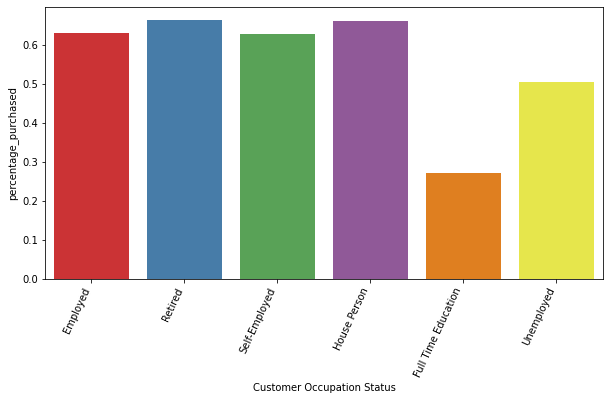

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=employement_status,
    x='Customer Occupation Status',
    y='percentage_purchased',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
)




> The Bar Charts shows the percentages of occupation status of BGLi customers who subscribe to insurance policies. 


In [ ]:
#Using the Age_grp of customers to do analysis
Age_grp1 = data[(data['Customer Age'] > 0) & (data['Customer Age'] < 25)]
Age_grp2 = data[(data['Customer Age'] > 25) & (data['Customer Age'] < 35)]
Age_grp3 = data[(data['Customer Age'] > 35) & (data['Customer Age'] < 50)]
Age_grp4 = data[data['Customer Age'] >= 50 ]

In [ ]:
data['age_grp'] = 0
data['age_grp'] = np.where((data['Customer Age'] > 0) & (data['Customer Age'] < 25),0,data['age_grp']) 
data['age_grp'] = np.where((data['Customer Age'] >= 25) & (data['Customer Age'] < 35),1,data['age_grp']) 
data['age_grp'] = np.where((data['Customer Age'] >= 35) & (data['Customer Age'] < 50),2,data['age_grp']) 
data['age_grp'] = np.where(data['Customer Age'] >= 50 ,3, data['age_grp'])

data['age_grp']


0        2
1        3
2        3
3        3
4        3
        ..
19995    3
19996    1
19997    3
19998    1
19999    3
Name: age_grp, Length: 20000, dtype: int64

In [ ]:
d=data.groupby('age_grp')['age_grp'].count().reset_index(name='count')
purchased_df = data[data['Purchase Flag'] == 1]
age_purchased_grouped = purchased_df.groupby('age_grp')['age_grp'].count().reset_index(name='count')

age_status=d.sort_values('count',ascending=False)
age_status['count_p'] = age_purchased_grouped['count']


age_status['percentage_purchased'] = age_status['count_p'] / age_status['count_p'].sum()
age_status

,age_grp,count,count_p,percentage_purchased
3,3,13510,9112,0.711931
2,2,5065,3102,0.242363
1,1,1155,516,0.040316
0,0,270,69,0.005391




> The chart shows that the Age_group with the highest purchase are the 50 yrs and above in index(3), which is followed by the 35-50 yrs range in index(2), the 25-35 yrs range in index(1) and the least the 0-25 yrs range in index(0). 


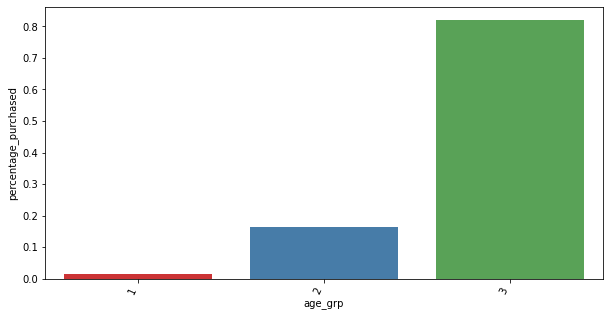

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=age_status,
    y='percentage_purchased',
    x='age_grp',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
)


In [ ]:
# processing some strategic columns for analysis
Af=data.groupby('Customer Marital Status')['Channel'].count().reset_index(name='count')
purchased_Af = data[data['Purchase Flag'] == 1]
purchased_Af_grouped = purchased_Af.groupby('Customer Marital Status')['Channel'].count().reset_index(name='count')
#spliting of the dataset 
Marital_status=Af.sort_values('count',ascending=False)
Marital_status['count_p'] = purchased_Af_grouped['count']


In [ ]:
Af

,Customer Marital Status,count
0,Divorced,1750
1,Married,13902
2,Partnered,1819
3,Single,2529


Text(0.5, 0, 'Count')

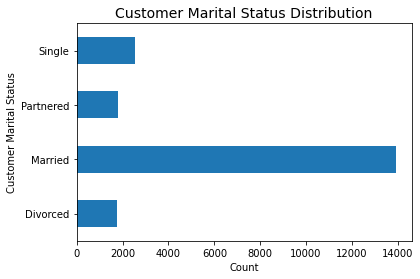

In [ ]:
Af.plot.barh(x='Customer Marital Status',y='count',legend=False)
plt.title('Customer Marital Status Distribution',fontsize=14)
plt.xlabel('Count')

In [ ]:
Marital_status['percentage_M'] = Marital_status['count_p'] / Marital_status['count']
Marital_status


,Customer Marital Status,count,count_p,percentage_M
1,Married,13902,9104,0.654870
3,Single,2529,1478,0.584421
2,Partnered,1819,1138,0.625618
0,Divorced,1750,1079,0.616571




> The Table shows the total number of Marital status of customers who purchace a licence through one channel or the other, and the percentages of customer's marital status that bought an insurance. In terms of the highest purchaser, Married customers purchase more compared to others. Although, purchase the highest index of insurance policies with 1138 out of 1819. And the least, purchased customers are the singles(1478 out of 2529).  


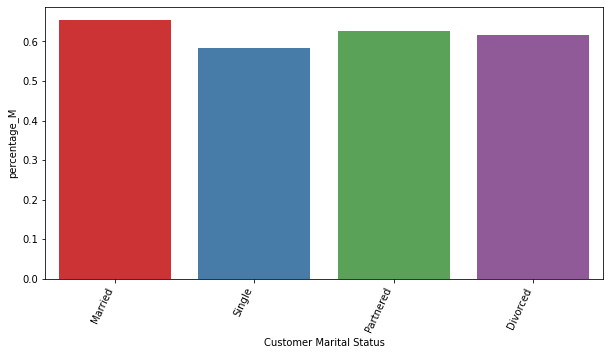

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=Marital_status,
    x='Customer Marital Status',
    y='percentage_M',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
)


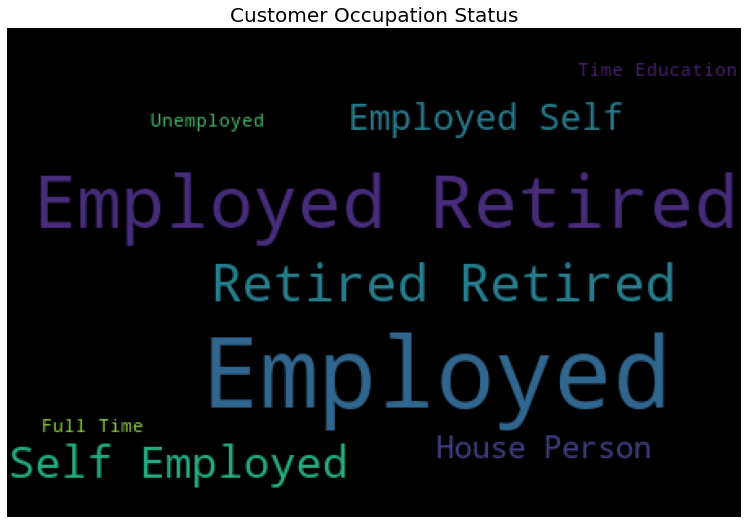

In [ ]:
job_title=data['Customer Occupation Status'][~pd.isnull(data['Customer Occupation Status'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Customer Occupation Status'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()



> Wordcount showing the most occured occupation status.



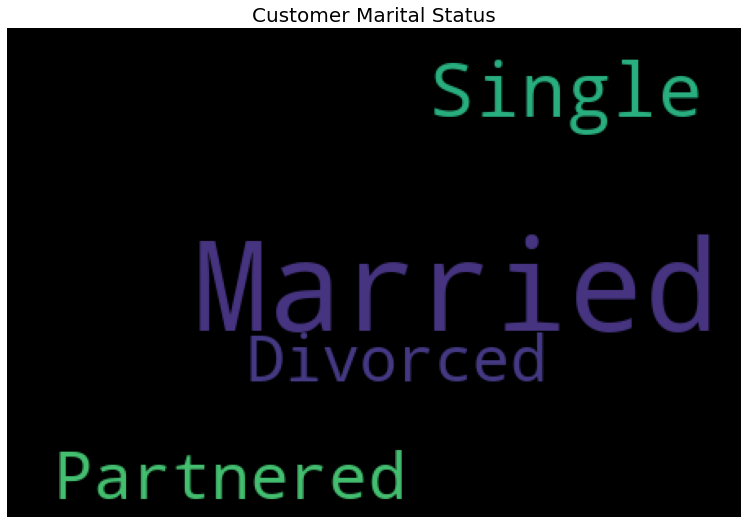

In [ ]:
job_title=data['Customer Marital Status'][~pd.isnull(data['Customer Marital Status'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Customer Marital Status'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()



> Wordcount showing the most occured marrital status.



### The brand is looking to increase volume by 200 sales per month – what action would you propose and why?

The dataset indicates that employed customers account for a majority of insurance purchases. Retirees and self-employed individuals follow behind and the singles are the least purchasers of an insurance policy. As a result of the data provided, these following categories of customers should be the target market of BGLi for selling their insurance products.
It is essential that BGLi target their most profitable customers because they contribute the most to their profit margin. In order to increase the sales for the single persons with the least amount of coverage, the company should concentrate on retaining high valued customers on the insurance policies they subscribe. Perhaps a good strategy would be to provide singles with a policy that would enhance their interest in purchasing a suitable insurance ‌policy.

